In [80]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [81]:
df = pd.read_excel('new users.xlsx',index_col='Month', parse_dates=True)
df.head()

,New Users
Month,
2010-01-01,560
2010-02-01,590
2010-03-01,660
2010-04-01,645
2010-05-01,605


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2010-01-01 to 2021-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   New Users  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


<AxesSubplot:xlabel='Month'>

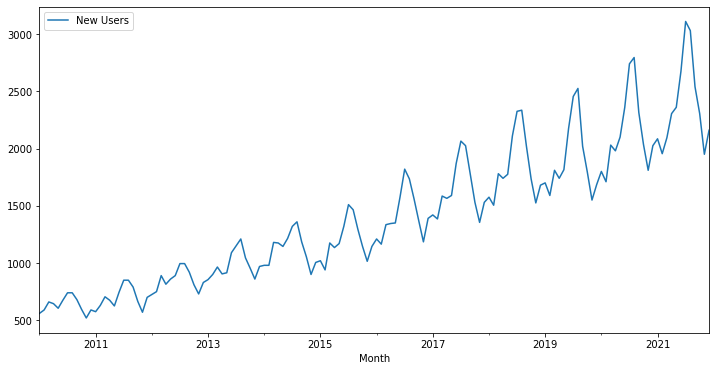

In [83]:
df[['New Users']].plot(figsize = (12,6))

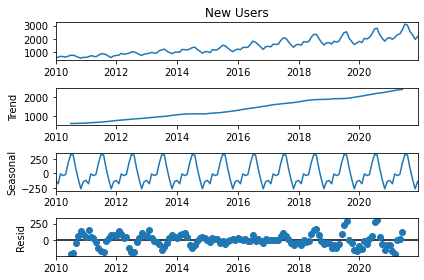

In [84]:
decompose_result = seasonal_decompose(df["New Users"])
decompose_result.plot();

In [85]:
df.index.freq = "MS"
alpha = 0.2

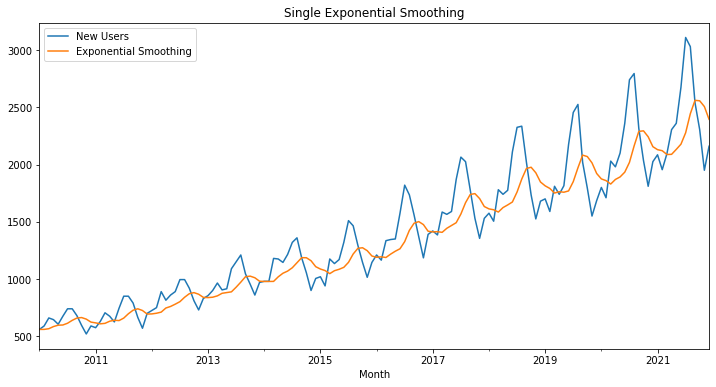

In [86]:
# Single Exponential Smoothing 
df["Exponential Smoothing"] = SimpleExpSmoothing(df["New Users"]).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
df[["New Users","Exponential Smoothing"]].plot(title="Single Exponential Smoothing",figsize = (12,6));

# התחזית של החלקה מעריכית יחידה לא מתאימה.  היא לא מתחשבת בעונתיות

In [87]:
df

,New Users,Exponential Smoothing
Month,,
2010-01-01,560,560.000000
2010-02-01,590,560.000000
2010-03-01,660,566.000000
2010-04-01,645,584.800000
2010-05-01,605,596.840000
...,...,...
2021-08-01,3030,2443.838078
2021-09-01,2540,2561.070463
2021-10-01,2305,2556.856370


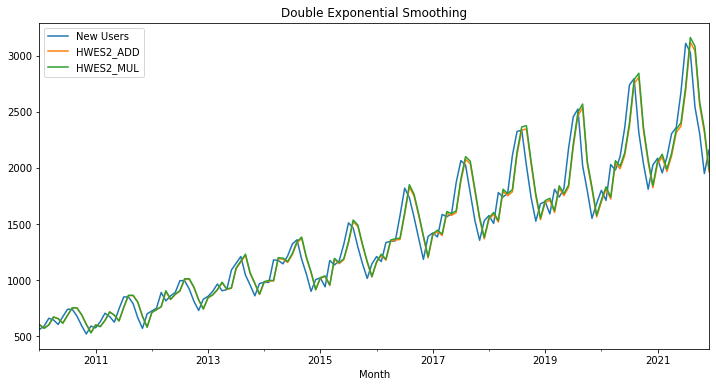

In [88]:
# Double Exponential Smoothing # שיטת הולט
df["HWES2_ADD"] = ExponentialSmoothing(df["New Users"],trend="add").fit().fittedvalues
df["HWES2_MUL"] = ExponentialSmoothing(df["New Users"],trend="mul").fit().fittedvalues
df[["New Users","HWES2_ADD","HWES2_MUL"]].plot(title="Double Exponential Smoothing",figsize = (12,6));

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


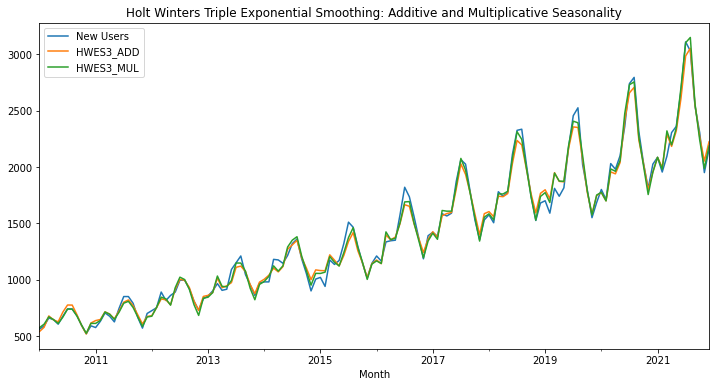

In [89]:
# Triple Exponential Smoothing # שיטת וינטרס

df["HWES3_ADD"] = ExponentialSmoothing(df["New Users"],trend="add",seasonal="add",seasonal_periods=12).fit().fittedvalues
df["HWES3_MUL"] = ExponentialSmoothing(df["New Users"],trend="mul",seasonal="mul",seasonal_periods=12).fit().fittedvalues
df[["New Users","HWES3_ADD","HWES3_MUL"]].plot(title="Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality",figsize = (12,6));



In [90]:
df.shape

(144, 6)

In [91]:
forecast_data = pd.read_excel("new users.xlsx",index_col="Month",parse_dates=True)
forecast_data.index.freq = "MS"

train_df = forecast_data[:120] # נתונים ראשונים
test_df = forecast_data[120:] # נתונים אחרונים

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

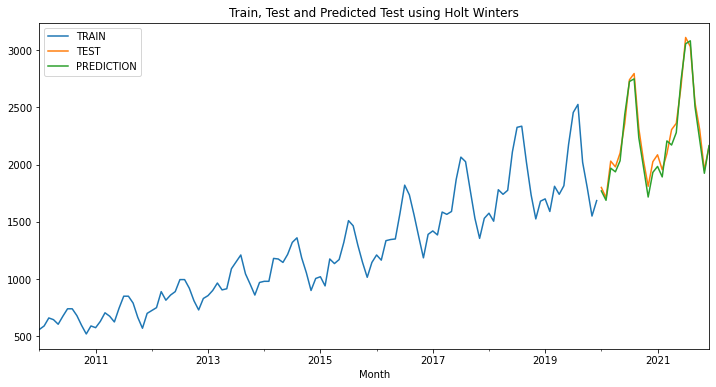

In [92]:
# תחזית
fitted_model = ExponentialSmoothing(train_df["New Users"],trend="mul",seasonal="mul",seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(24)
train_df["New Users"].plot(legend=True,label="TRAIN",figsize = (12,6))
test_df["New Users"].plot(legend=True,label="TEST",figsize = (12,6))
test_predictions.plot(legend=True,label="PREDICTION",figsize = (12,6))
plt.title("Train, Test and Predicted Test using Holt Winters")

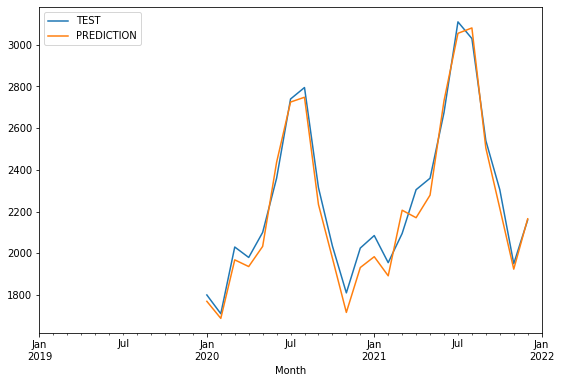

In [93]:
test_df["New Users"].plot(legend=True,label="TEST",figsize=(9,6))
test_predictions.plot(legend=True,label="PREDICTION",xlim=["2019.01.01","2022.01.01"]);

In [94]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f"Mean Absolute Error = {mean_absolute_error(test_df,test_predictions)}")
print(f"Mean Squared Error = {mean_squared_error(test_df,test_predictions)}")

Mean Absolute Error = 62.44927132823739
Mean Squared Error = 4888.626136414412
